In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# read json into a pandas dataframe
players = pd.read_json('players.json')

# re-order columns
players = players[['year','name','pos','age','status','prev_team','new_team','dollars','years_signed']]

In [250]:
players.head()

,year,name,pos,age,status,prev_team,new_team,dollars,years_signed
0,2006,Moises Alou,LF,39,Signed (A),Giants,Mets,"$8,500,000",1
1,2006,Tony Armas,SP,28,Signed,Nationals,Pirates,"$3,500,000",1
2,2006,Rich Aurilia,1B,34,Signed (A),Reds,Giants,"$8,000,000",2
3,2006,Danys Baez,RP,28,Signed (A),Braves,Orioles,"$19,000,000",3
4,2006,Paul Bako,C,33,Signed,Royals,Orioles,"$900,000",1


# Analysis of Contract Dollar Values by Year

First we clean the 'dollars' column by removing non-digit characters and casting from string to int.

In [251]:
if players['dollars'].dtype == 'object':
    players['dollars'] = players['dollars'].str.replace('$','').str.replace(',','').astype(int)

We can generate a scatter plot which shows the size of each contract signed alongside the year.  The points for Alex Rodriguez and Bryce Harper's record-setting contracts are labeled.

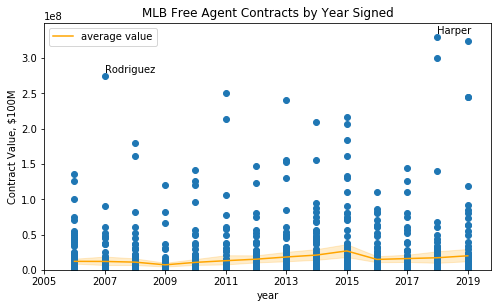

In [252]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2,1,1)

x_ticks = 2*np.arange(8) + 2005
y_ticks = 50000000 * np.arange(7)

# Scatter plot
ax1 = sns.lineplot(players['year'], players['dollars'], color='orange', label='average value')
ax1.legend(loc='best')
ax1.scatter(players['year'], players['dollars'])
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_ylim([0,350000000])
ax1.set_title('MLB Free Agent Contracts by Year Signed')
ax1.set_ylabel('Contract Value, $100M')
ax1.text(2007,280000000,'Rodriguez')
ax1.text(2018,335000000,'Harper')

plt.show()

# Analysis of Contract Dollar Values by Age

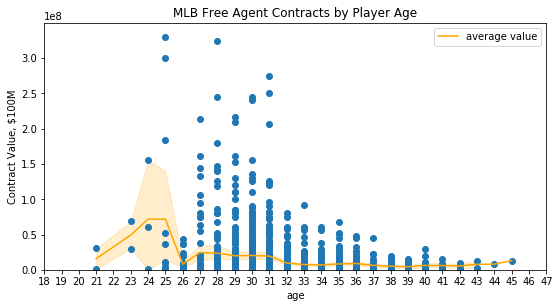

In [253]:
fig = plt.figure(figsize=(9,10))
ax1 = fig.add_subplot(2,1,1)

x_ticks = np.arange(30) + 18
y_ticks = 50000000 * np.arange(7)

# Scatter plot
ax1 = sns.lineplot(players['age'], players['dollars'], color='orange', label='average value')
ax1.legend(loc='best')
ax1.scatter(players['age'], players['dollars'])
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)
ax1.set_ylim([0,350000000])
ax1.set_title('MLB Free Agent Contracts by Player Age')
ax1.set_ylabel('Contract Value, $100M')

plt.show()